In [3]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
pip install catboost


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 101.1/101.1 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 99.8/99.8 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import joblib, scipy, sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


In [7]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install imblearn


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 257.7/257.7 kB 2.3 MB/s eta 0:00:00
     ------------------------------------ 302.2/302.2 kB 644.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import joblib, scipy, sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


In [4]:
df = pd.read_csv(r"C:\Users\akank\Internship\dataSet.csv")

df.head()


ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [5]:
df.drop(['ID'],axis=1,inplace=True)

In [6]:
df.shape

(418, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [8]:
df.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     41.250000    871.500000   80.600000      84.250000  188.500000   
50%     73.000000   1259.000000  114.700000     108.000000  251.000000   
75%    123.000000   1980.000000  151.900000     151.000000  318.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

In [9]:
df.isnull().sum() / len(df) * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

In [10]:
df[df.duplicated()]

Empty DataFrame
Columns: [N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []

N_Days
Skewness: 0.4726020506759292
Kurtosis: -0.4821388331042038


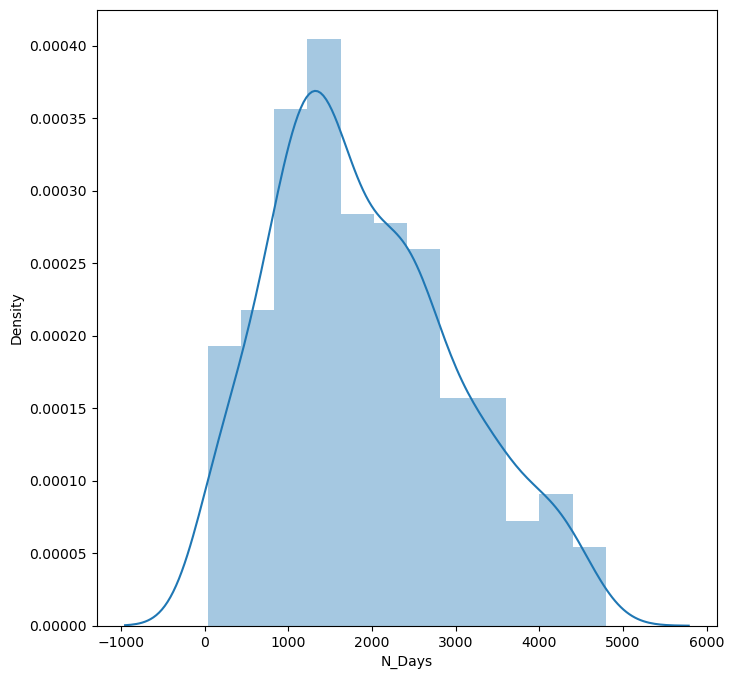

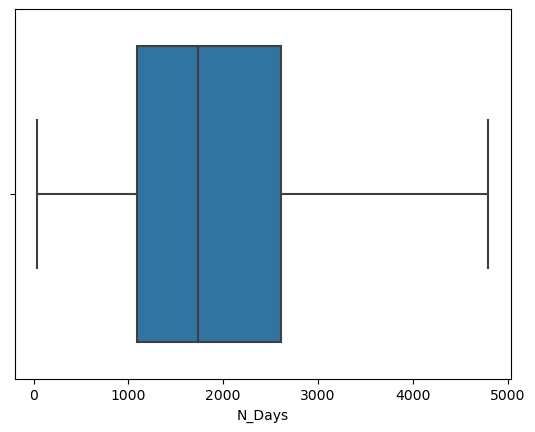

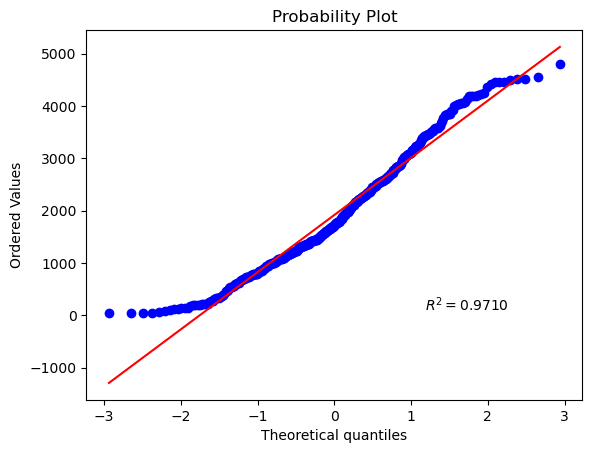

Age
Skewness: 0.08685015608405514
Kurtosis: -0.616730132346194


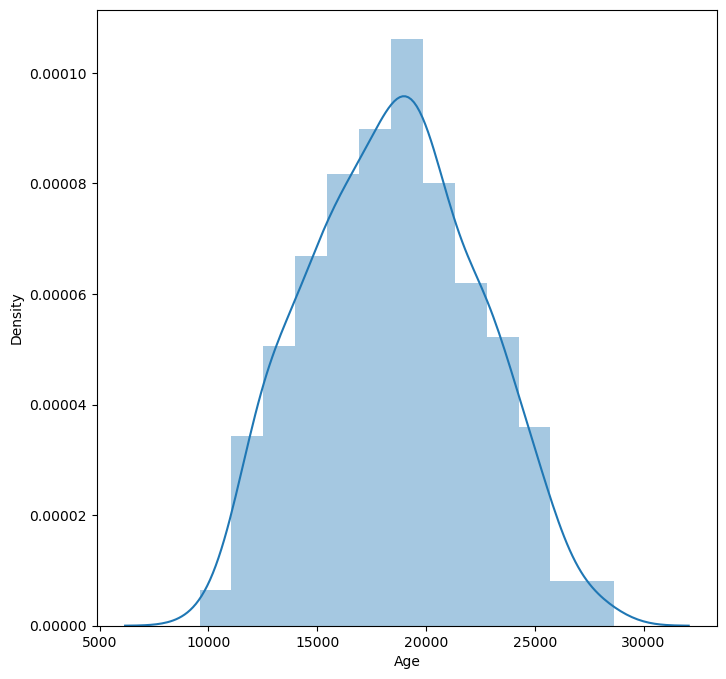

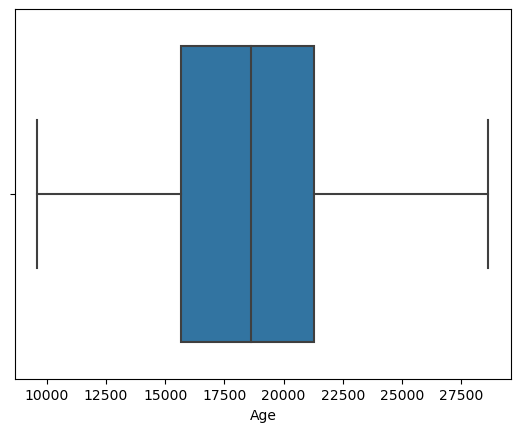

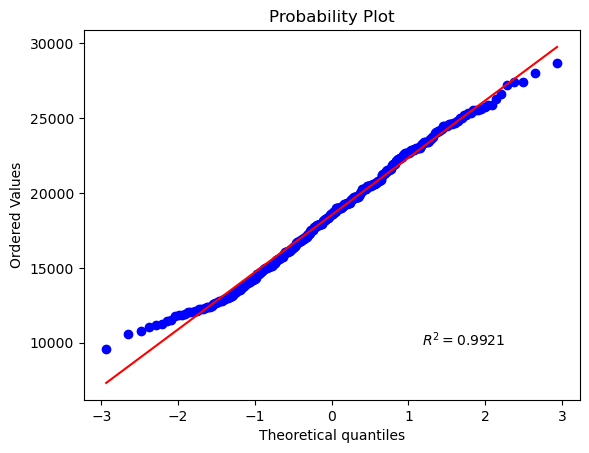

Bilirubin
Skewness: 2.717610708740455
Kurtosis: 8.065335678744502


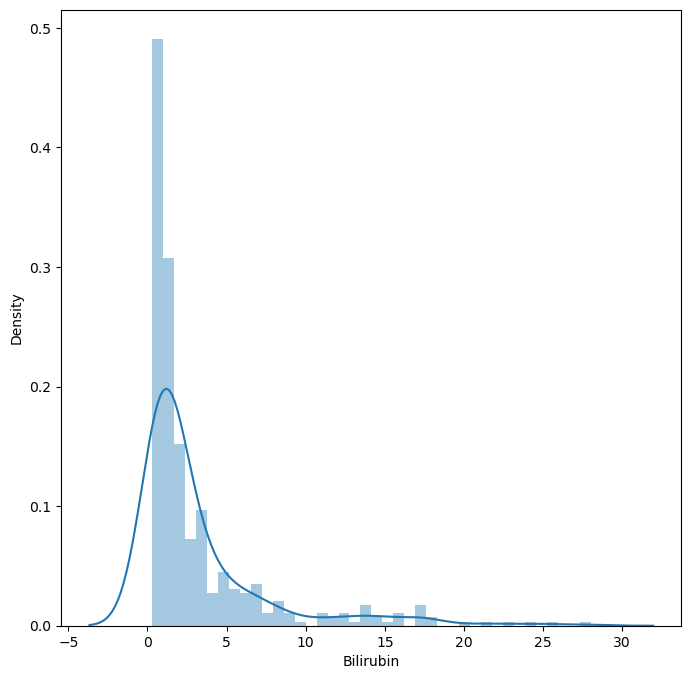

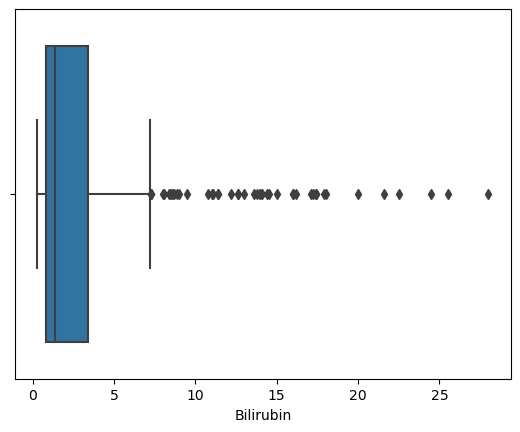

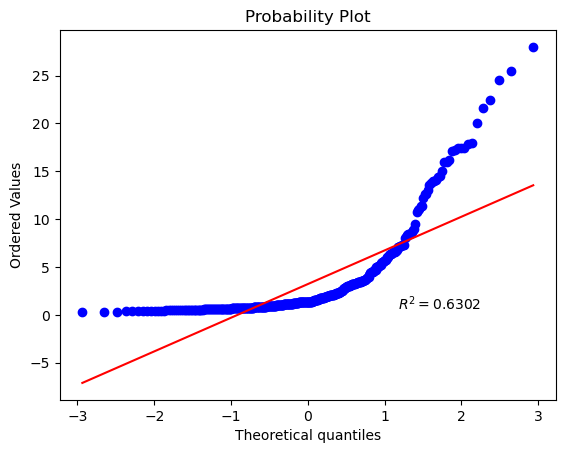

Cholesterol
Skewness: 3.408525855721416
Kurtosis: 14.337869865983716


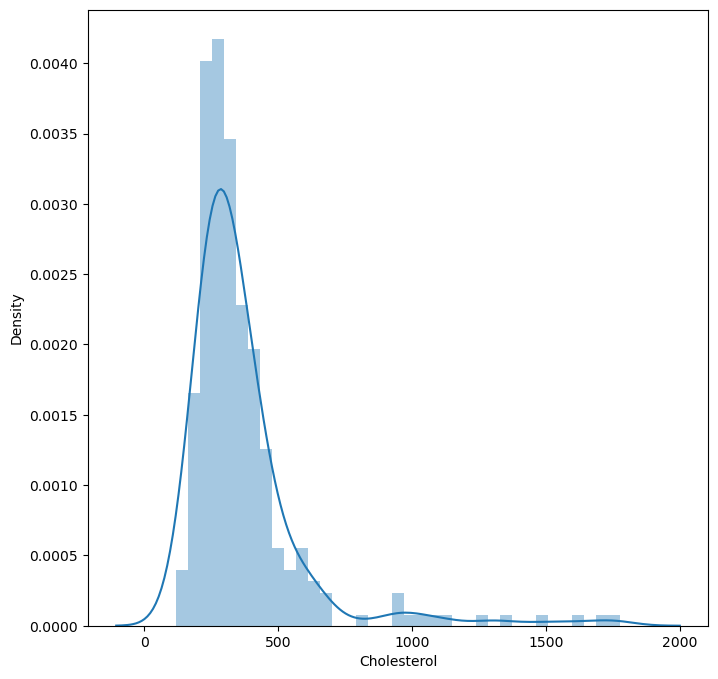

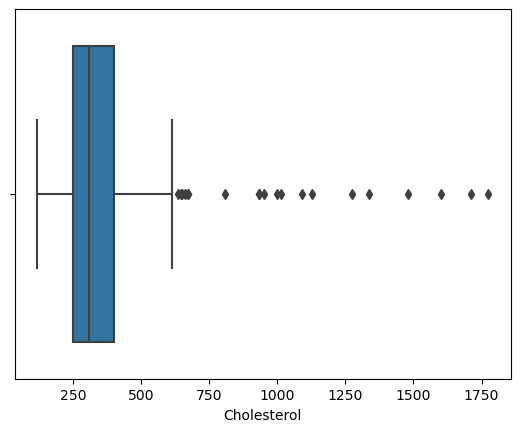

posx and posy should be finite values
posx and posy should be finite values


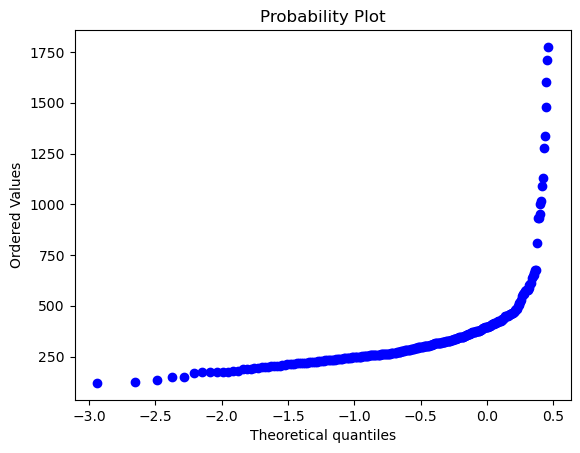

Albumin
Skewness: -0.4675265141762801
Kurtosis: 0.5667445291024173


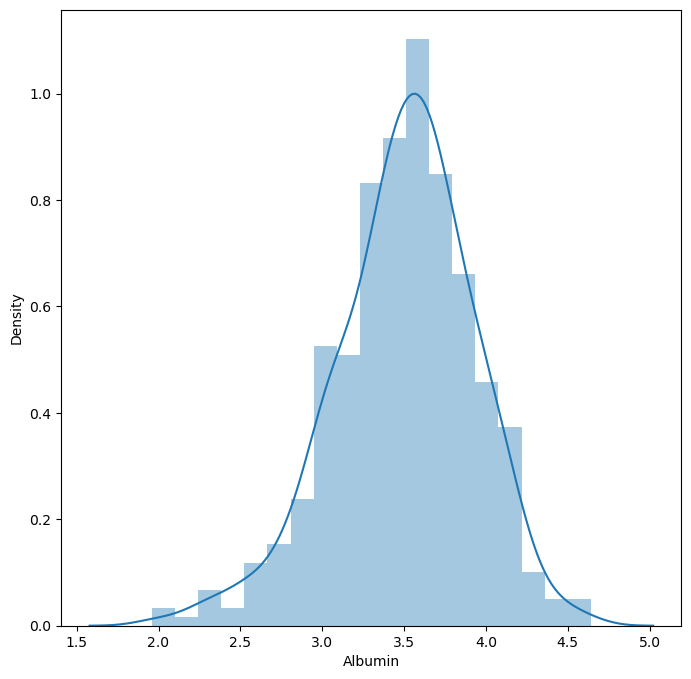

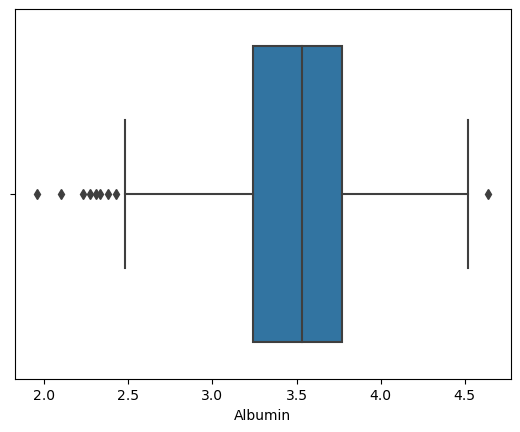

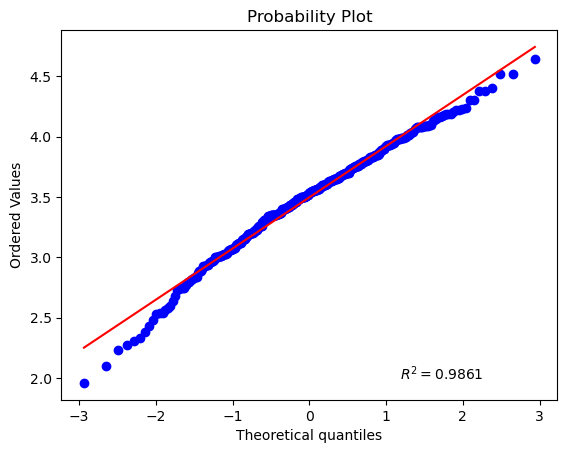

Copper
Skewness: 2.3036399957832616
Kurtosis: 7.624023449861701


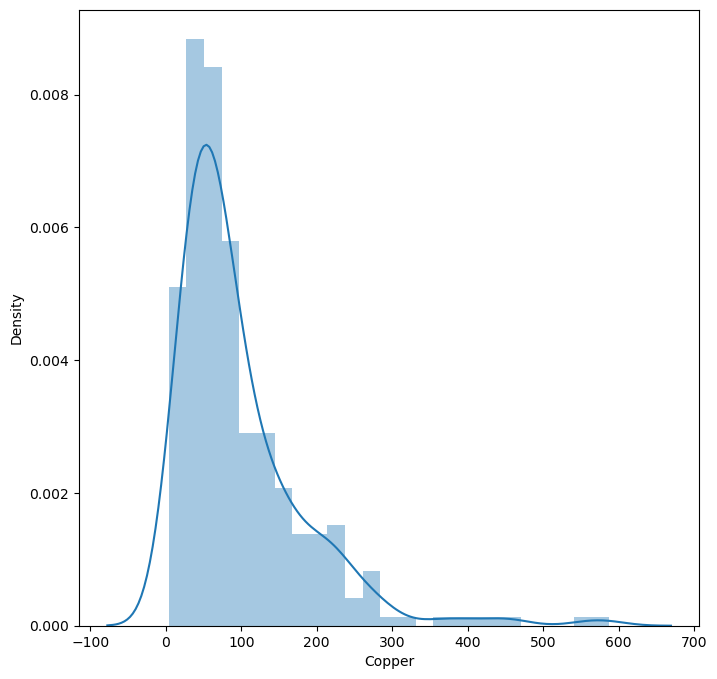

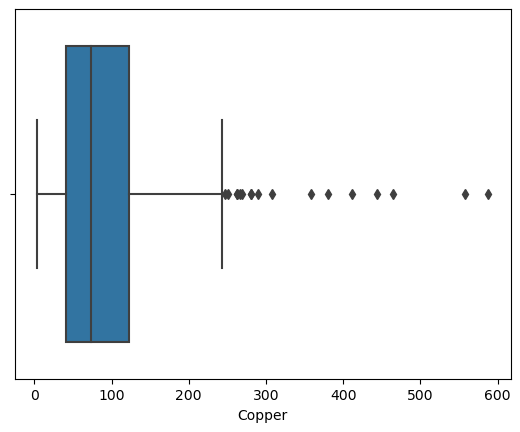

posx and posy should be finite values
posx and posy should be finite values


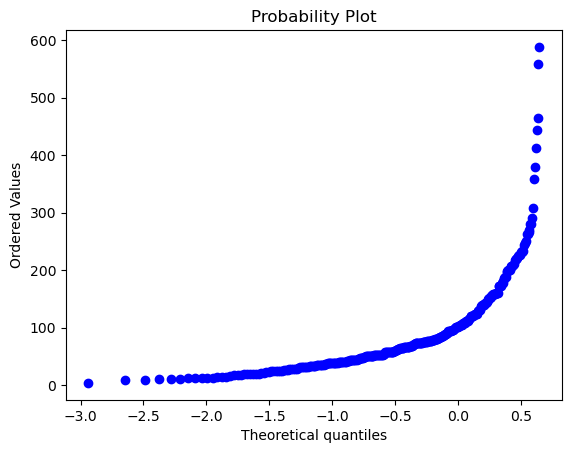

Alk_Phos
Skewness: 2.9928343153496115
Kurtosis: 9.662553460966153


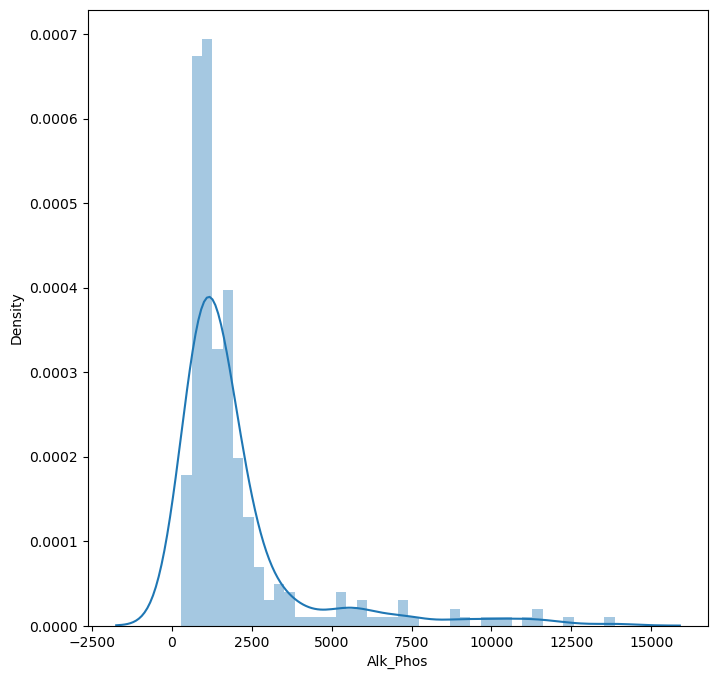

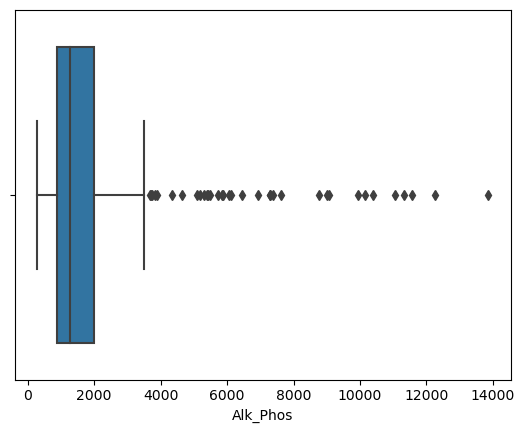

posx and posy should be finite values
posx and posy should be finite values


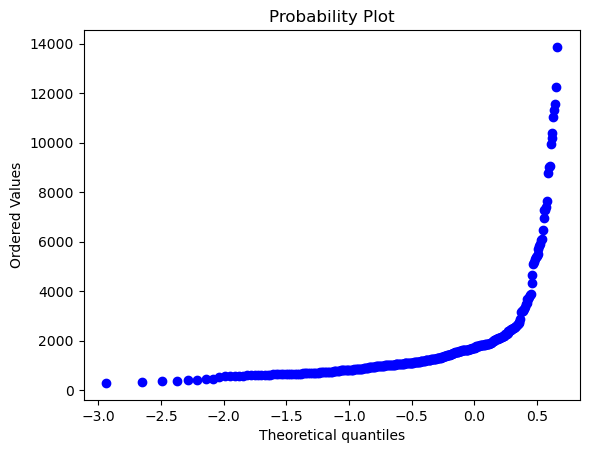

Sgot
Skewness: 1.4491969235882083
Kurtosis: 4.311975857605217


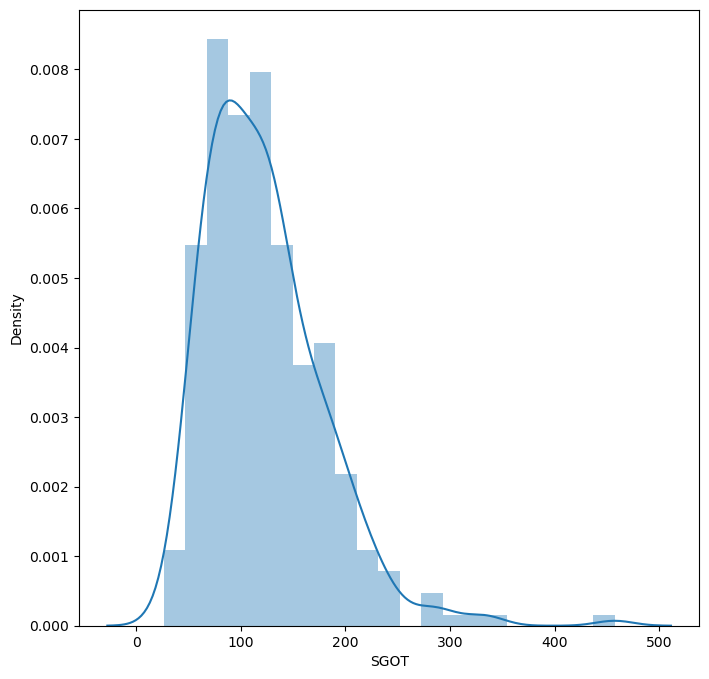

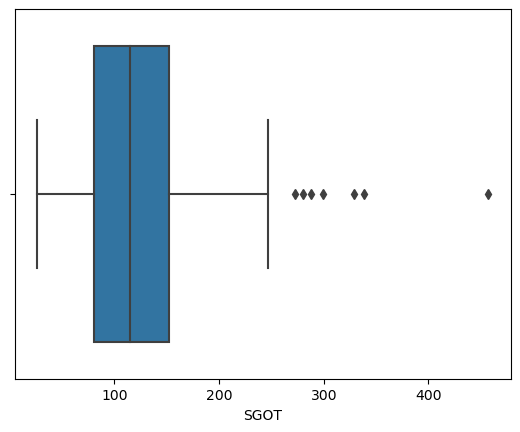

posx and posy should be finite values
posx and posy should be finite values


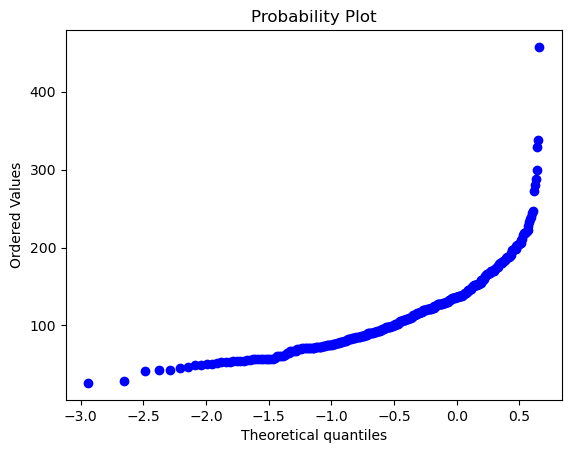

Tryglicerides
Skewness: 2.5239024664577845
Kurtosis: 11.802753128498216


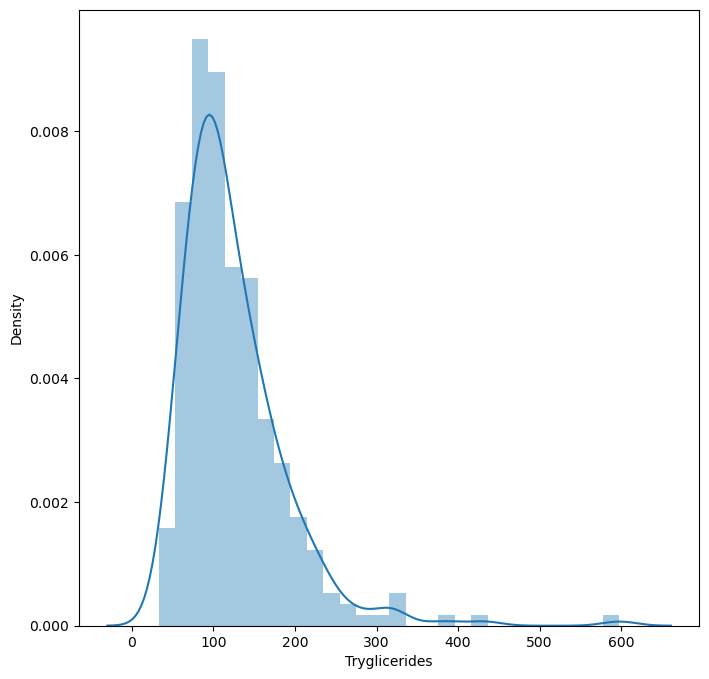

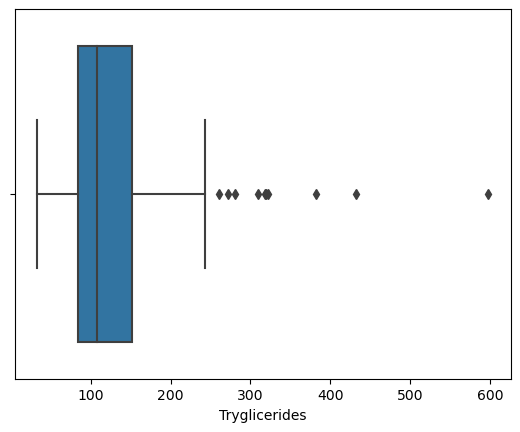

posx and posy should be finite values
posx and posy should be finite values


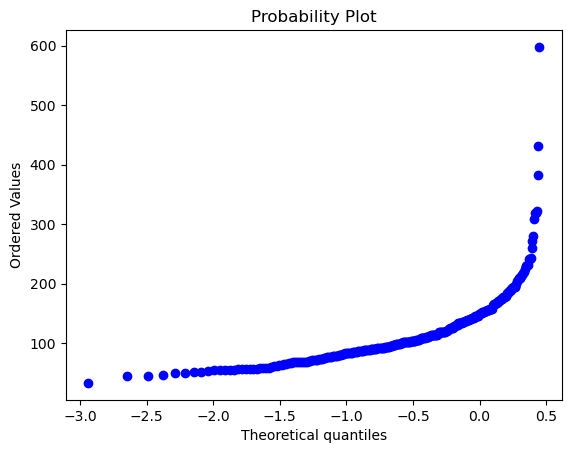

Platelets
Skewness: 0.6270977603715678
Kurtosis: 0.8630445578915271


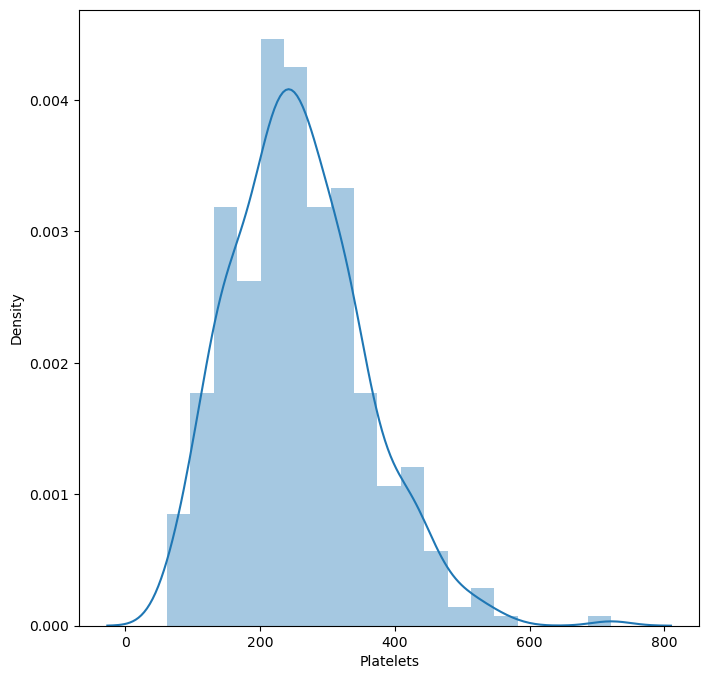

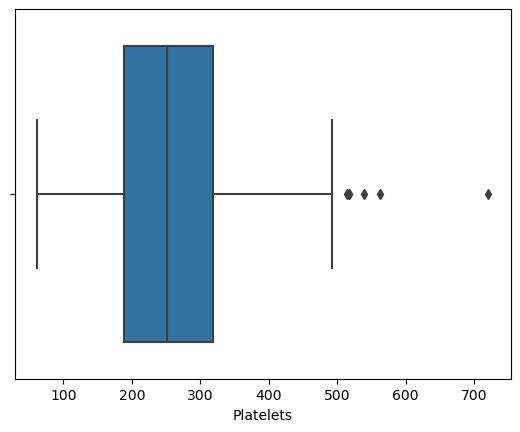

posx and posy should be finite values
posx and posy should be finite values


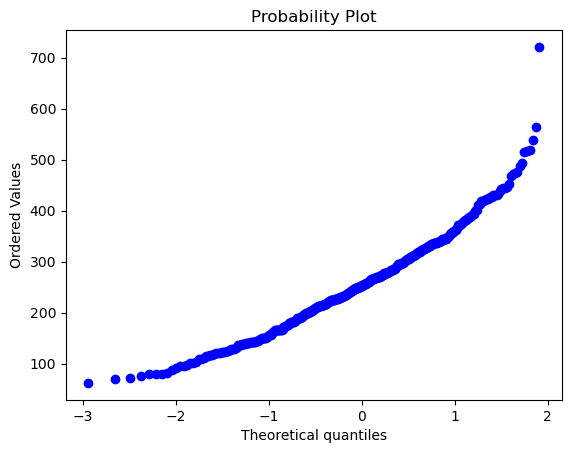

Prothrombin
Skewness: 2.223276154109735
Kurtosis: 10.040772735082795


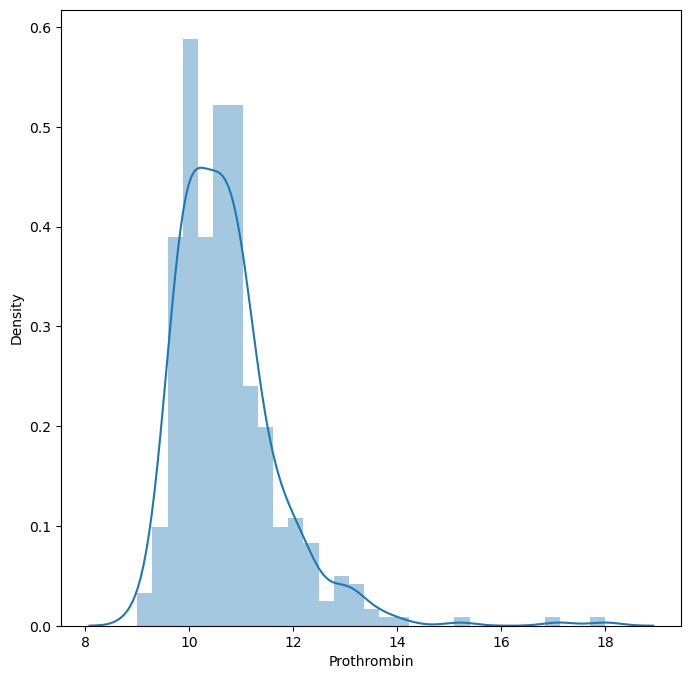

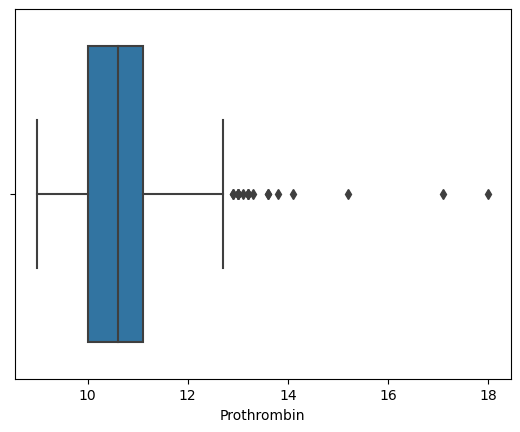

posx and posy should be finite values
posx and posy should be finite values


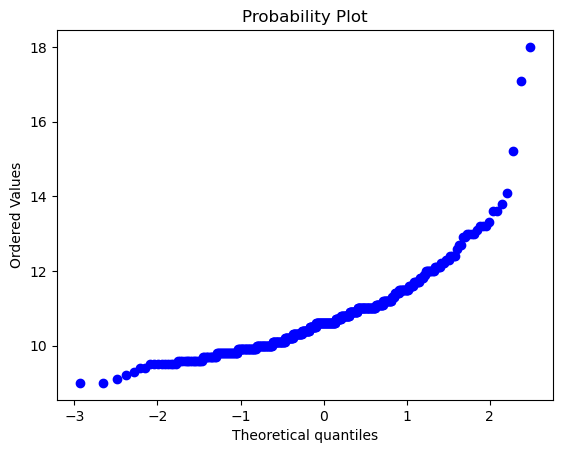

In [11]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if col not in ['Stage']:
            print(col.title())
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurtosis())
            plt.figure(figsize=(8,8))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(df[col])
            plt.show()
            scipy.stats.probplot(df[col],plot=plt,rvalue=True)
            plt.show()


In [12]:
def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()




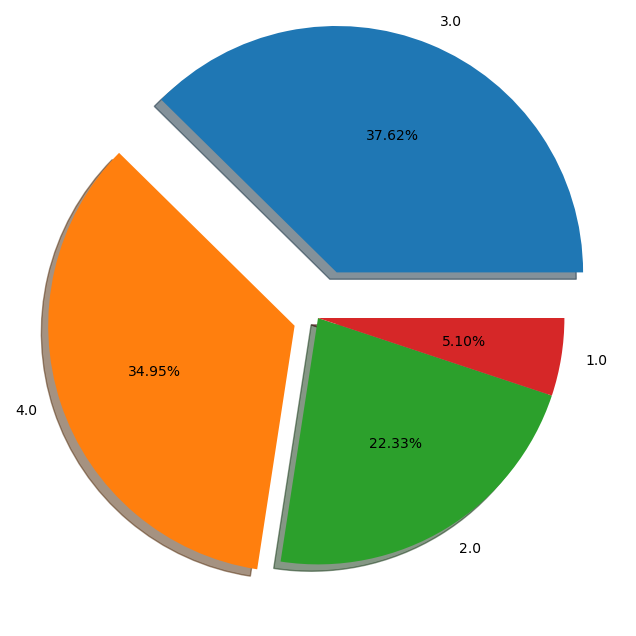

In [13]:
pie_chart(df,'Stage')

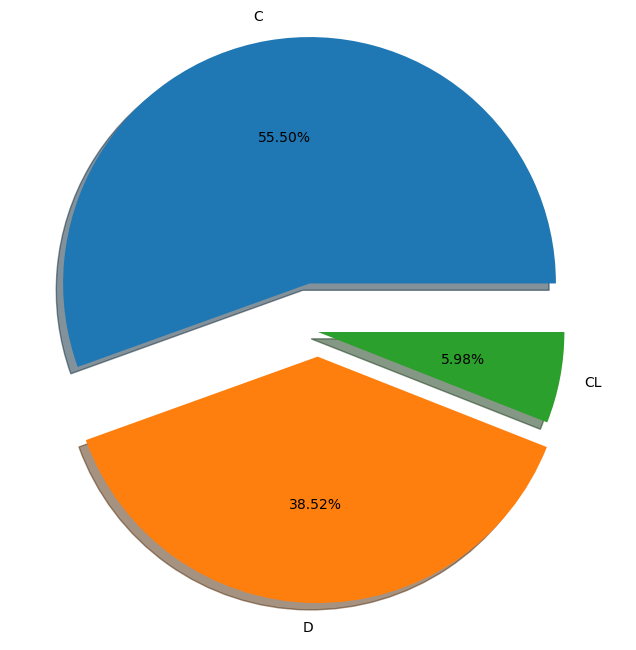

In [14]:
pie_chart(df,'Status')

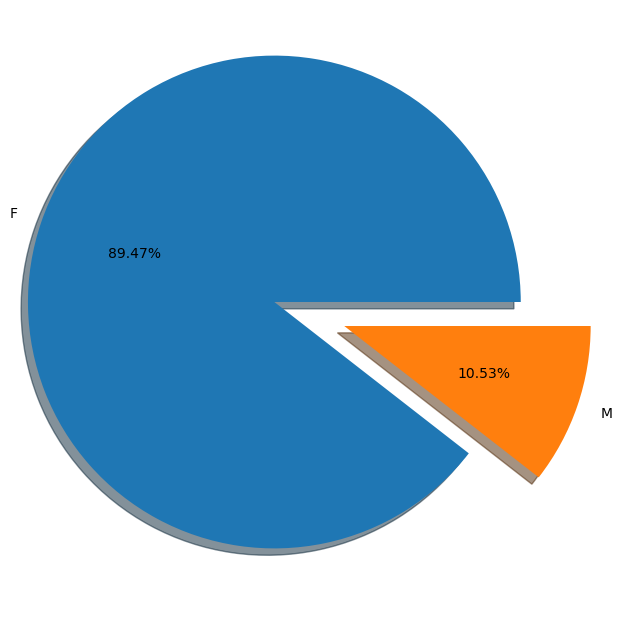

In [15]:
pie_chart(df,'Sex')

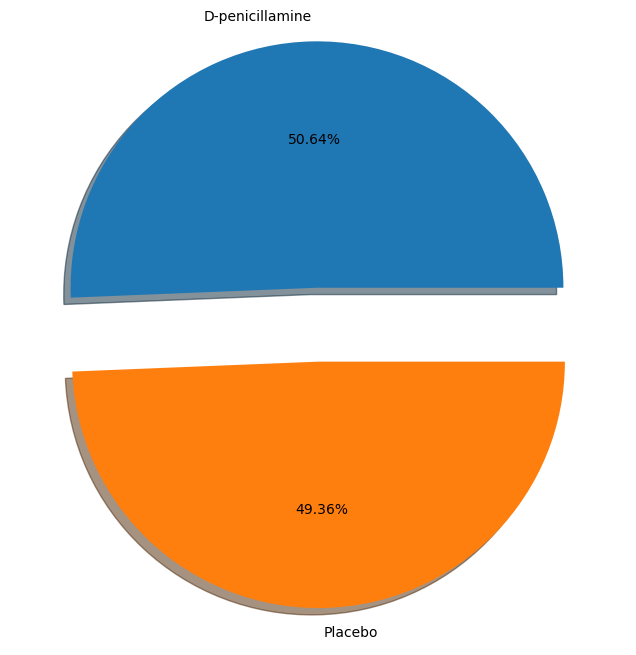

In [16]:
pie_chart(df,'Drug')

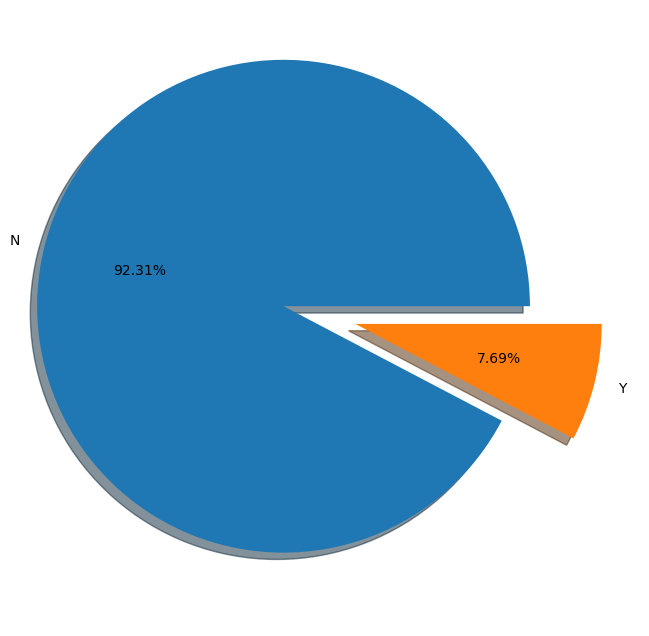

In [17]:
pie_chart(df,'Ascites')

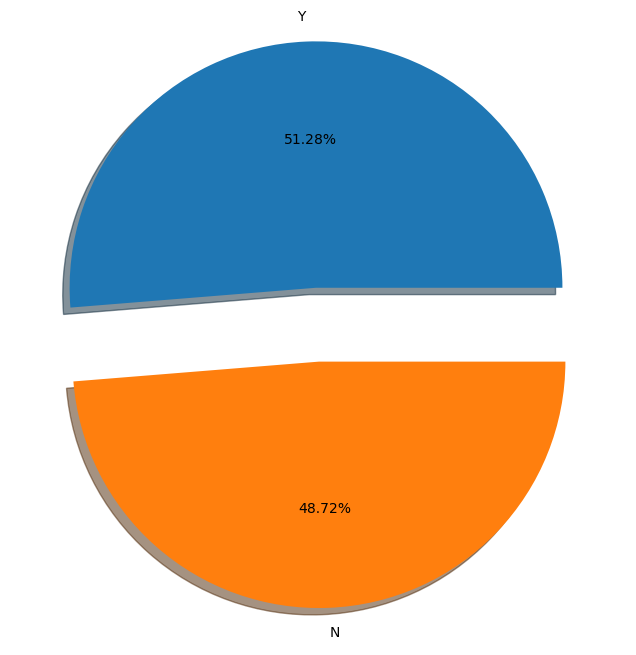

In [18]:
pie_chart(df,'Hepatomegaly')

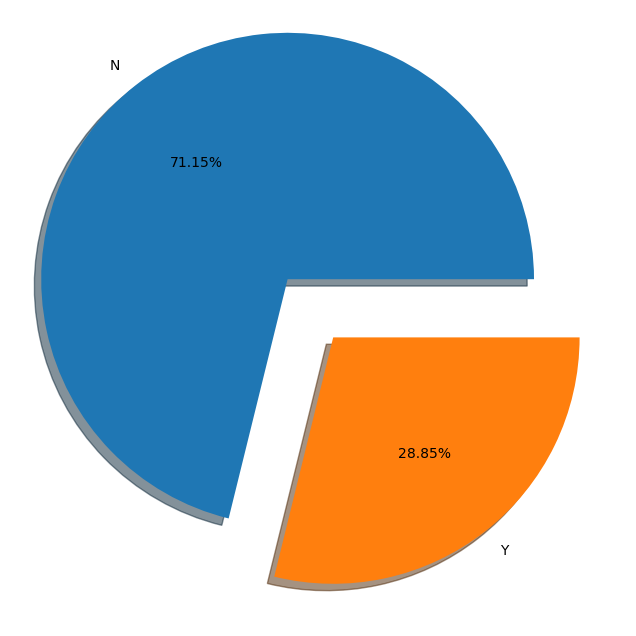

In [19]:
pie_chart(df,'Spiders')

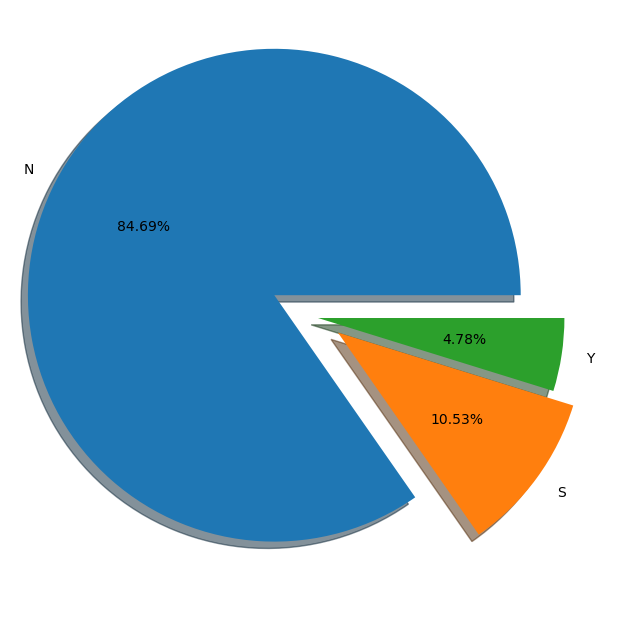

In [20]:
pie_chart(df,'Edema')

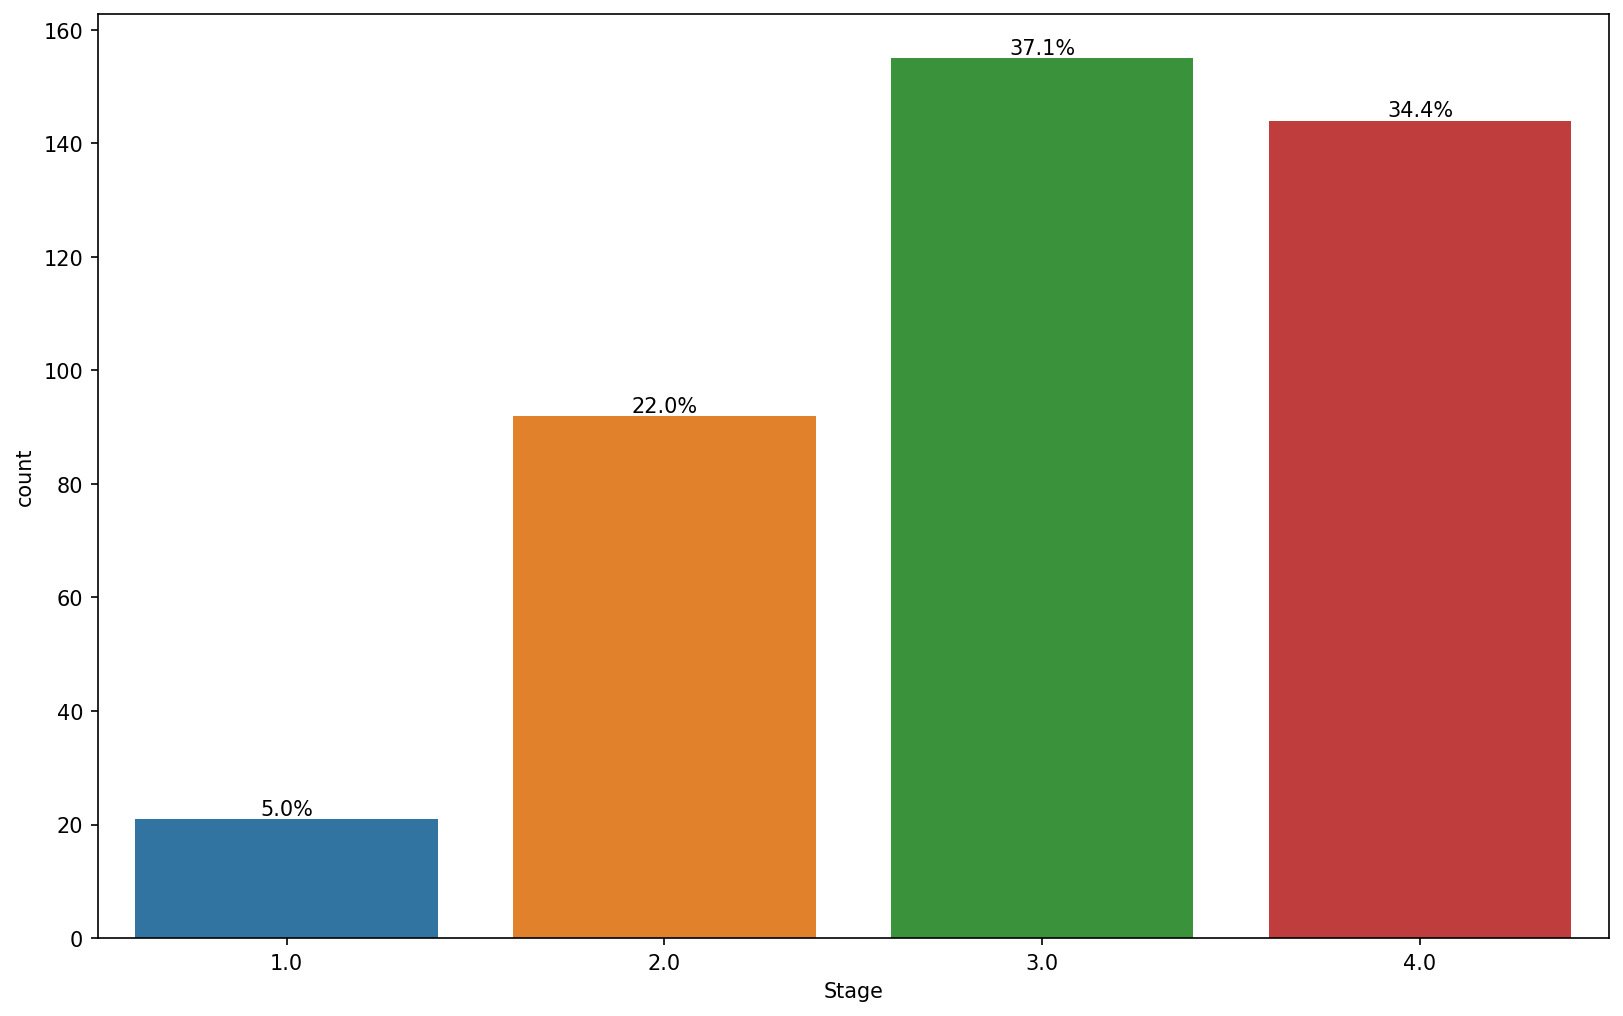

In [21]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(df.Stage)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')


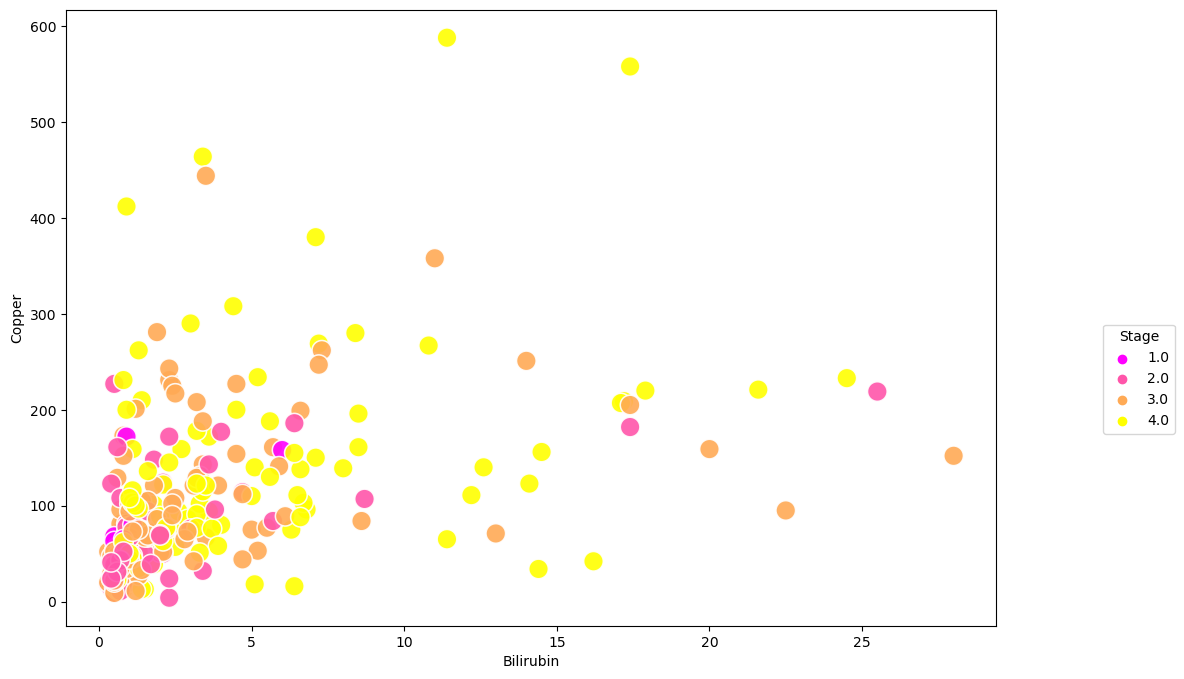

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")


In [23]:
males = df[df.Sex == 'M']
females = df[df.Sex == 'F']


In [24]:
males.describe()

females.describe()


N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   374.000000    374.000000  374.000000   249.000000  374.000000   
mean   1920.577540  18319.823529    3.262567   370.502008    3.493021   
std    1092.953174   3740.397415    4.591388   238.726563    0.421527   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1095.500000  15478.750000    0.700000   252.000000    3.240000   
50%    1773.000000  18333.000000    1.300000   309.000000    3.520000   
75%    2606.250000  20819.000000    3.400000   395.000000    3.767500   
max    4795.000000  28018.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  274.000000    276.000000  276.000000     247.000000  364.000000   
mean    90.208029   1957.834783  122.630145     123.465587  260.082418   
std     80.738377   2105.049047   57.916646      66.780963   99.418385   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     40.000000    877.500000   80.600000      84.000000  190.000000   
50%     67.000000   1270.500000  113.335000     106.000000  252.500000   
75%    111.750000   1963.750000  151.900000     146.000000  319.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   372.000000  368.000000  
mean     10.706989    3.019022  
std       1.030534    0.877926  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

In [26]:
round(males.Status.value_counts() / len(males) * 100,2)

D     54.55
C     38.64
CL     6.82
Name: Status, dtype: float64

In [27]:

round(females.Status.value_counts() / len(females) * 100,2)


C     57.49
D     36.63
CL     5.88
Name: Status, dtype: float64

In [28]:
round(males.Stage.value_counts() / len(males) * 100,2)

4.0    38.64
3.0    36.36
2.0    18.18
1.0     6.82
Name: Stage, dtype: float64

In [29]:
round(females.Stage.value_counts() / len(females) * 100,2)

3.0    37.17
4.0    33.96
2.0    22.46
1.0     4.81
Name: Stage, dtype: float64

In [30]:
round(males.Hepatomegaly.value_counts() / len(males) * 100,2)

Y    47.73
N    34.09
Name: Hepatomegaly, dtype: float64

In [31]:

round(females.Hepatomegaly.value_counts() / len(females) * 100,2)


Y    37.17
N    36.63
Name: Hepatomegaly, dtype: float64

<AxesSubplot:>

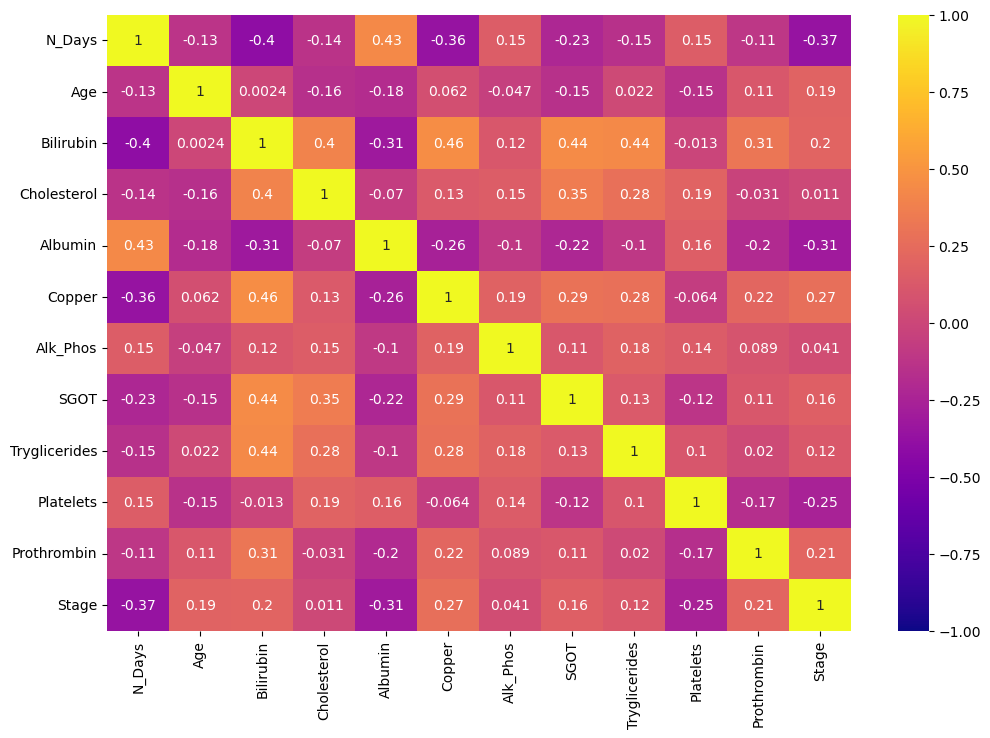

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)



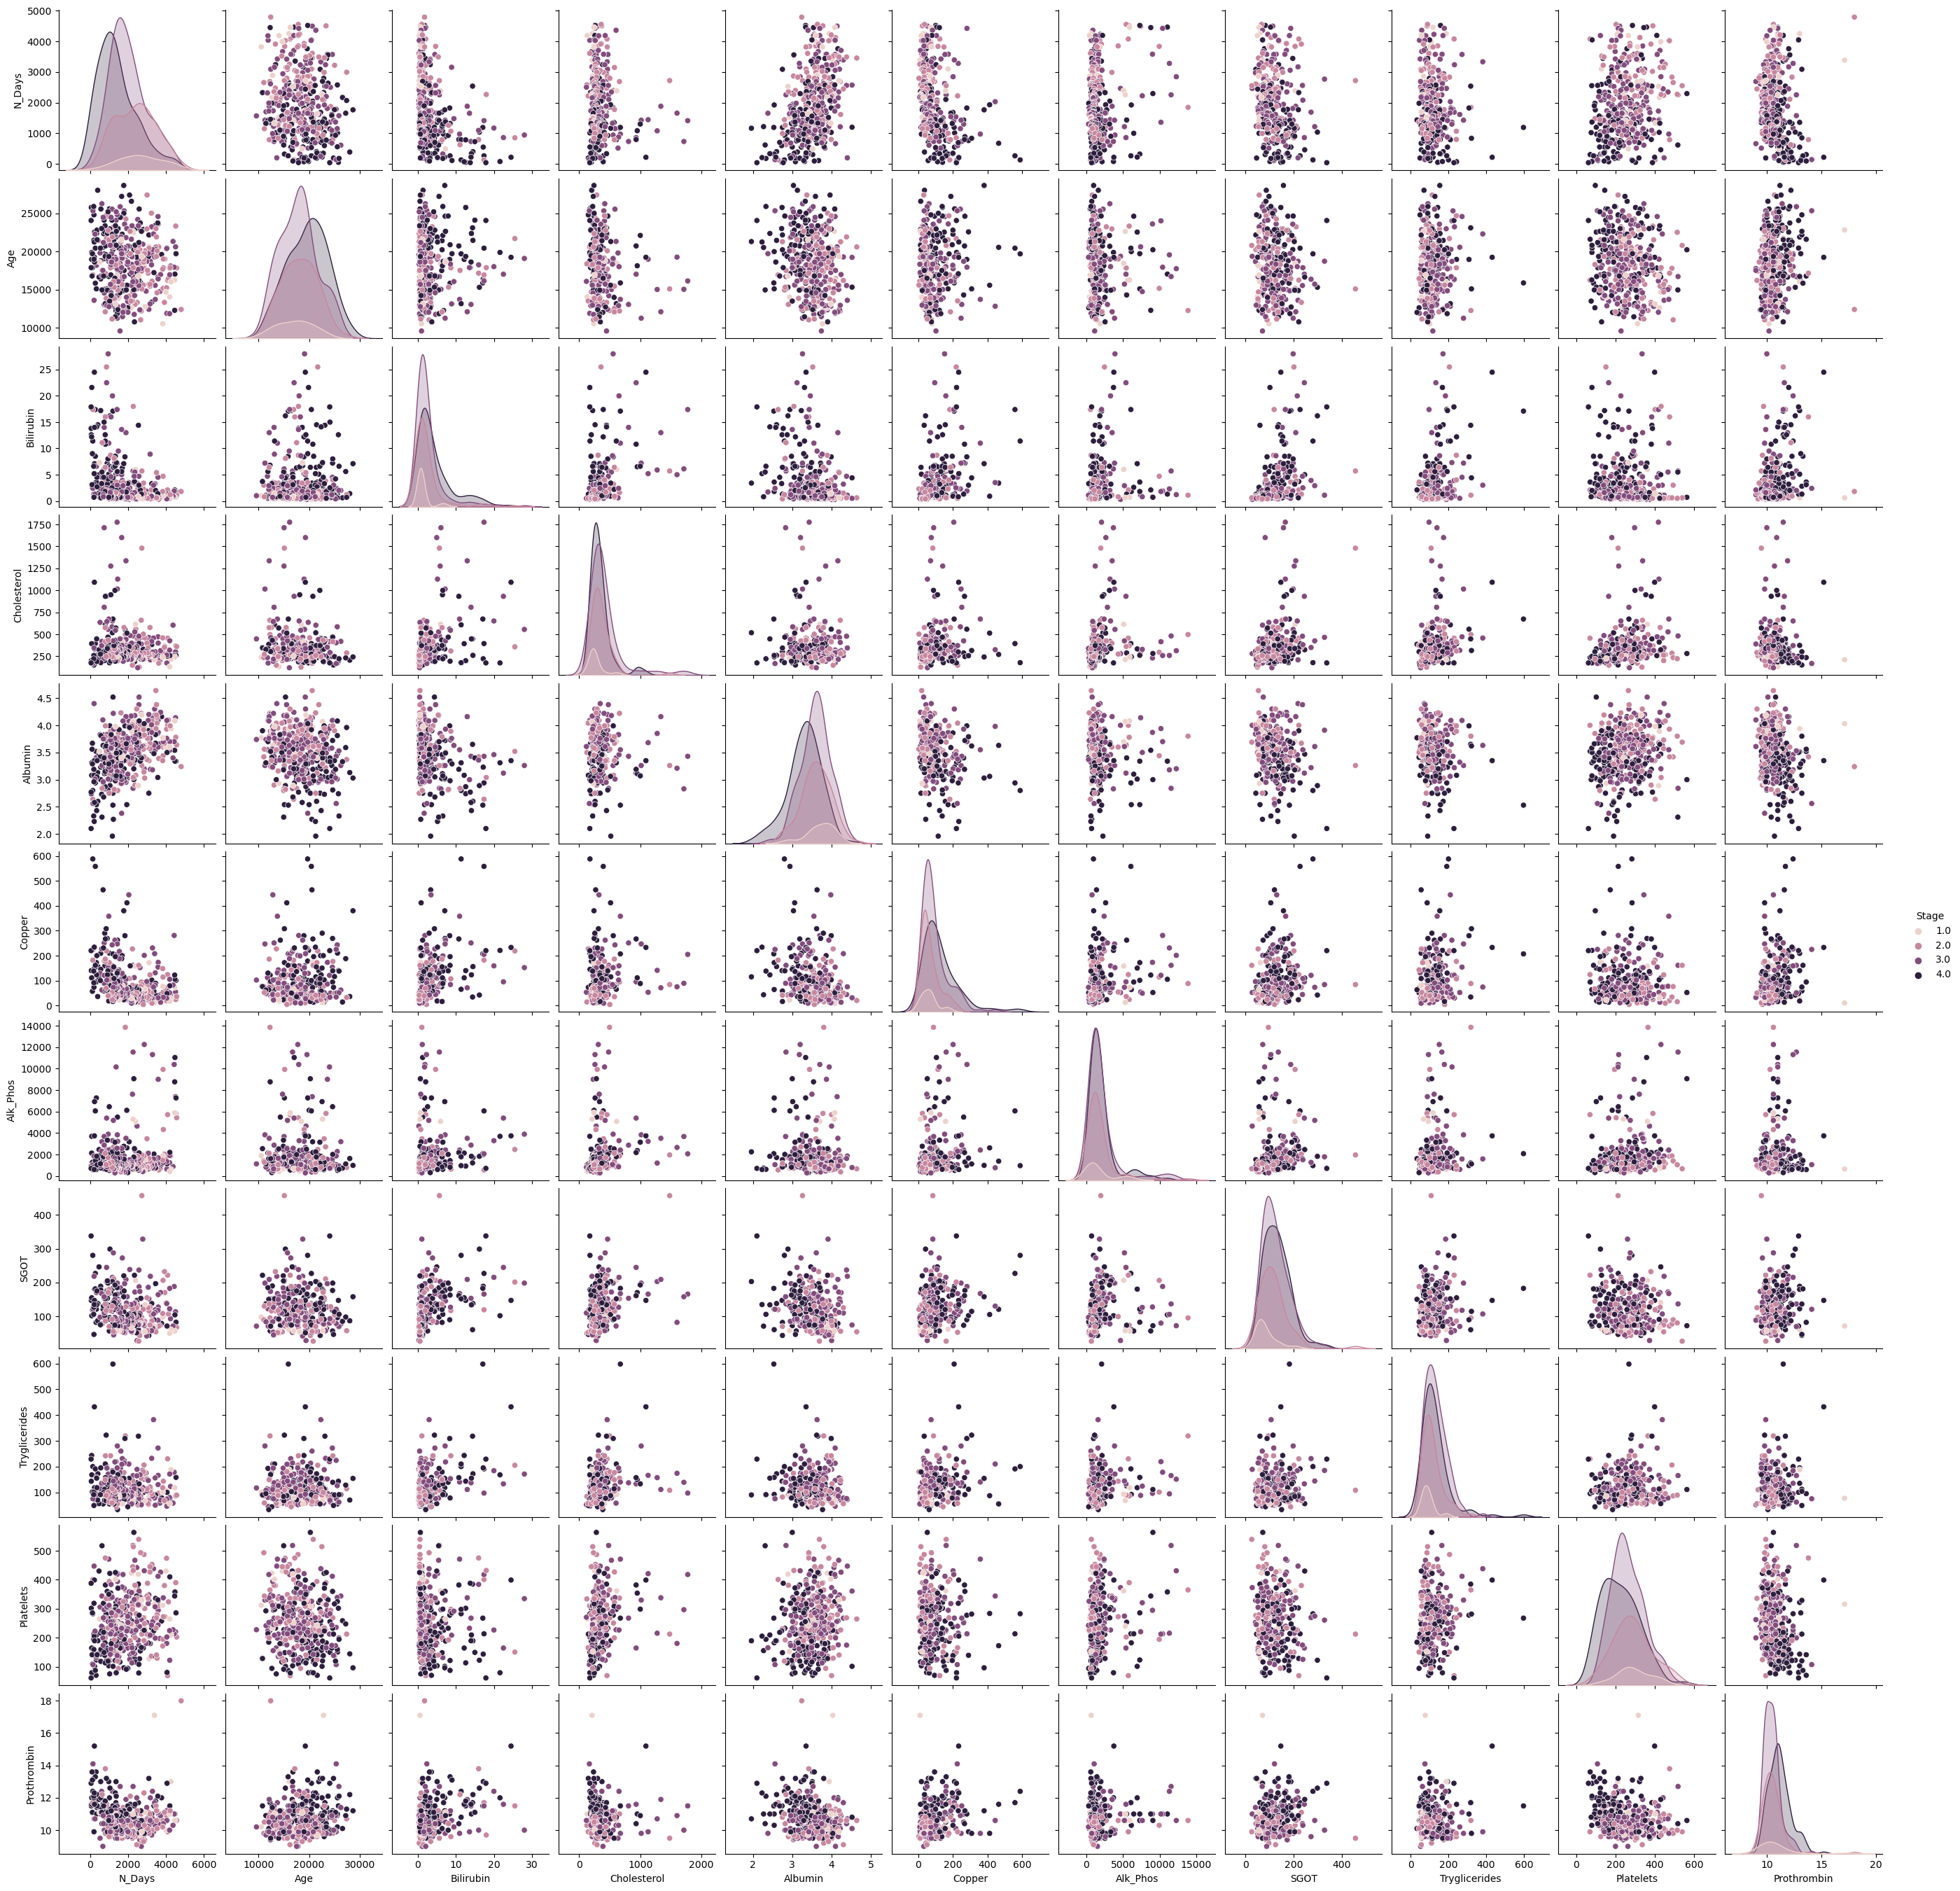

In [33]:
sns.pairplot(df,hue='Stage')

In [34]:
df.Age = (df.Age.values/365.0).round()
df.head()


N_Days Status             Drug   Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine  59.0   F       Y            Y       Y   
1    4500      C  D-penicillamine  56.0   F       N            Y       Y   
2    1012      D  D-penicillamine  70.0   M       N            N       N   
3    1925      D  D-penicillamine  55.0   F       N            Y       Y   
4    1504     CL          Placebo  38.0   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [35]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)


In [36]:
for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))


In [37]:
df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)


In [38]:
X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage


<AxesSubplot:xlabel='Stage', ylabel='count'>

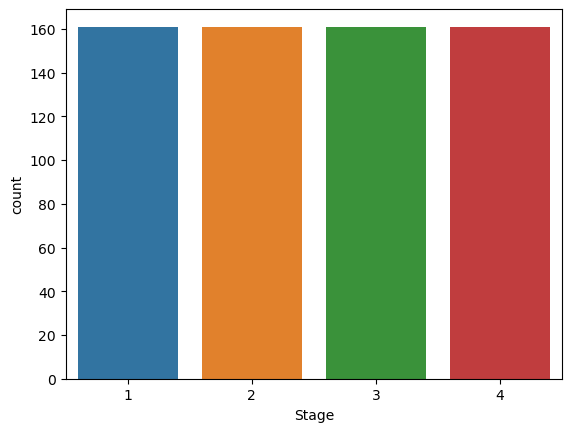

In [39]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

sns.countplot(y)


In [40]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()


Drug       Age       Sex   Ascites  Hepatomegaly   Spiders     Edema  \
0 -0.730627  0.933234 -0.373041  4.813788      0.921603  2.224859  3.142551   
1 -0.730627  0.623711 -0.373041 -0.215345      0.921603  2.224859  0.157998   
2 -0.730627  2.068155  3.094786 -0.215345     -1.144319 -0.483789 -2.826554   
3 -0.730627  0.520536 -0.373041 -0.215345      0.921603  2.224859 -2.826554   
4  1.539986 -1.233432 -0.373041 -0.215345      0.921603  2.224859  0.157998   

   Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0   2.385390    -0.692391 -2.413735  1.917525  0.565039  0.672474   
1  -0.510760    -0.112258  1.539481 -0.520134  2.174912  0.043773   
2  -0.370623    -1.895106 -0.154754  2.371599 -1.319156 -0.404527   
3  -0.183775    -0.932934 -2.567756 -0.281148  2.174912 -1.317339   
4   0.563618    -0.437698 -0.026403  1.606843 -1.076186  0.034251   

   Tryglicerides  Platelets  Prothrombin  
0       2.049300  -0.822599     1.976605  
1      -0.735444  -0.475994    -0.052264  
2      -1.829451  -1.258651     1.722996  
3      -0.602837  -0.900865    -0.432677  
4      -1.265872  -1.426363     0.328149

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression()

In [43]:
y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.48      0.58      0.52        50
           2       0.32      0.23      0.27        52
           3       0.31      0.38      0.34        39
           4       0.68      0.60      0.64        53

    accuracy                           0.45       194
   macro avg       0.45      0.45      0.44       194
weighted avg       0.46      0.45      0.45       194



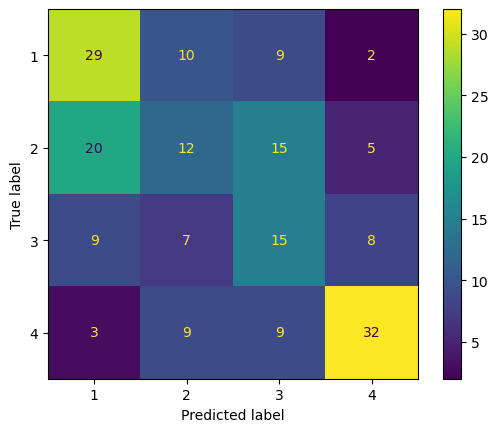

In [44]:
plot_confusion_matrix(logmodel,X_test,y_test)



In [45]:
svm = SVC()
svm.fit(X_train,y_train)


SVC()

In [46]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))


              precision    recall  f1-score   support

           1       0.61      0.92      0.74        50
           2       0.47      0.33      0.39        52
           3       0.33      0.33      0.33        39
           4       0.64      0.53      0.58        53

    accuracy                           0.54       194
   macro avg       0.51      0.53      0.51       194
weighted avg       0.53      0.54      0.52       194



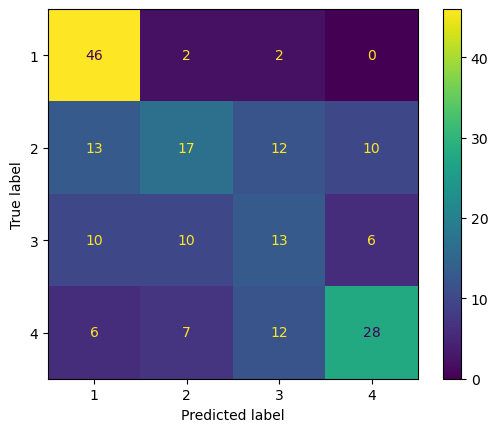

In [47]:
plot_confusion_matrix(svm,X_test,y_test)

In [48]:
scores = []
for i in np.arange(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))



Text(0, 0.5, 'Accuracy Score')

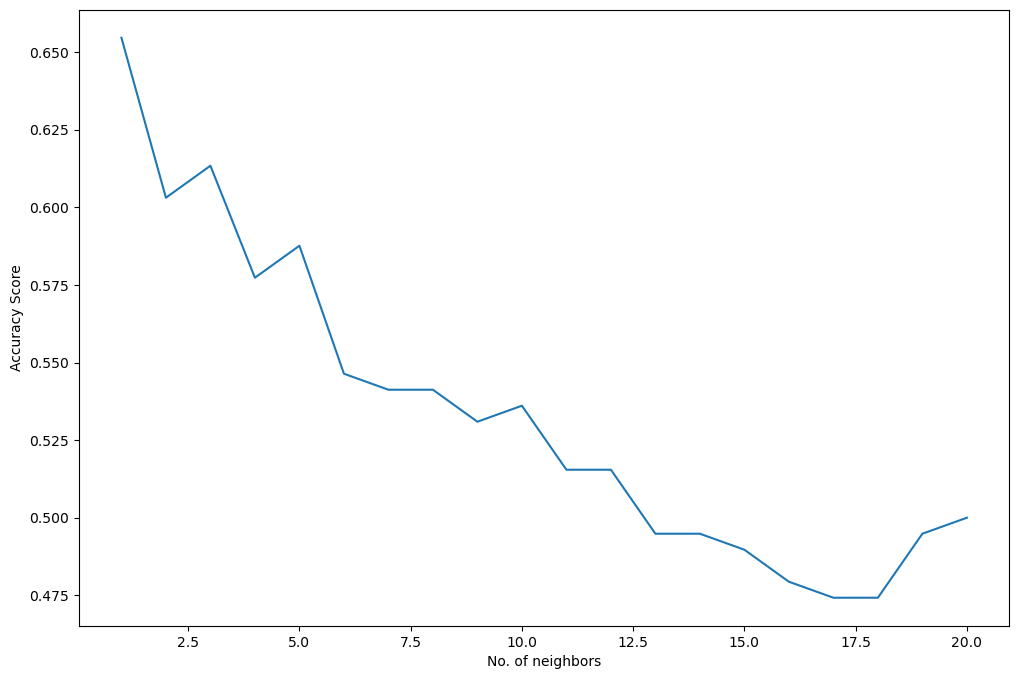

In [49]:

plt.figure(figsize=(12,8))
sns.lineplot(np.arange(1,21),scores)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')

In [50]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=17)

In [51]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))


[[44  1  3  2]
 [23 15  7  7]
 [14  8 12  5]
 [ 9  8 15 21]]
              precision    recall  f1-score   support

           1       0.49      0.88      0.63        50
           2       0.47      0.29      0.36        52
           3       0.32      0.31      0.32        39
           4       0.60      0.40      0.48        53

    accuracy                           0.47       194
   macro avg       0.47      0.47      0.44       194
weighted avg       0.48      0.47      0.45       194



In [52]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test,sgd_pred))
print(classification_report(y_test,sgd_pred))


[[15 28  5  2]
 [19 14 16  3]
 [ 8 10 16  5]
 [ 7  3 17 26]]
              precision    recall  f1-score   support

           1       0.31      0.30      0.30        50
           2       0.25      0.27      0.26        52
           3       0.30      0.41      0.34        39
           4       0.72      0.49      0.58        53

    accuracy                           0.37       194
   macro avg       0.39      0.37      0.37       194
weighted avg       0.40      0.37      0.38       194



In [53]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)


pac_pred = pac.predict(X_test)
print(confusion_matrix(y_test,pac_pred))
print(classification_report(y_test,pac_pred))


[[26 17  4  3]
 [24 12  9  7]
 [10 14  7  8]
 [ 7 11 11 24]]
              precision    recall  f1-score   support

           1       0.39      0.52      0.44        50
           2       0.22      0.23      0.23        52
           3       0.23      0.18      0.20        39
           4       0.57      0.45      0.51        53

    accuracy                           0.36       194
   macro avg       0.35      0.35      0.34       194
weighted avg       0.36      0.36      0.35       194



In [54]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)
print(confusion_matrix(y_test,ridge_pred))
print(classification_report(y_test,ridge_pred))



[[33  0 14  3]
 [24  5 16  7]
 [10  4 15 10]
 [ 4  6 11 32]]
              precision    recall  f1-score   support

           1       0.46      0.66      0.55        50
           2       0.33      0.10      0.15        52
           3       0.27      0.38      0.32        39
           4       0.62      0.60      0.61        53

    accuracy                           0.44       194
   macro avg       0.42      0.44      0.41       194
weighted avg       0.43      0.44      0.41       194



In [55]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))


[[43  1  5  1]
 [14 18  9 11]
 [ 7  5 22  5]
 [ 4  9 15 25]]
              precision    recall  f1-score   support

           1       0.63      0.86      0.73        50
           2       0.55      0.35      0.42        52
           3       0.43      0.56      0.49        39
           4       0.60      0.47      0.53        53

    accuracy                           0.56       194
   macro avg       0.55      0.56      0.54       194
weighted avg       0.56      0.56      0.54       194



In [56]:
scores = []
for i in np.arange(100,1001,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))


Text(0, 0.5, 'Accuracy Score')

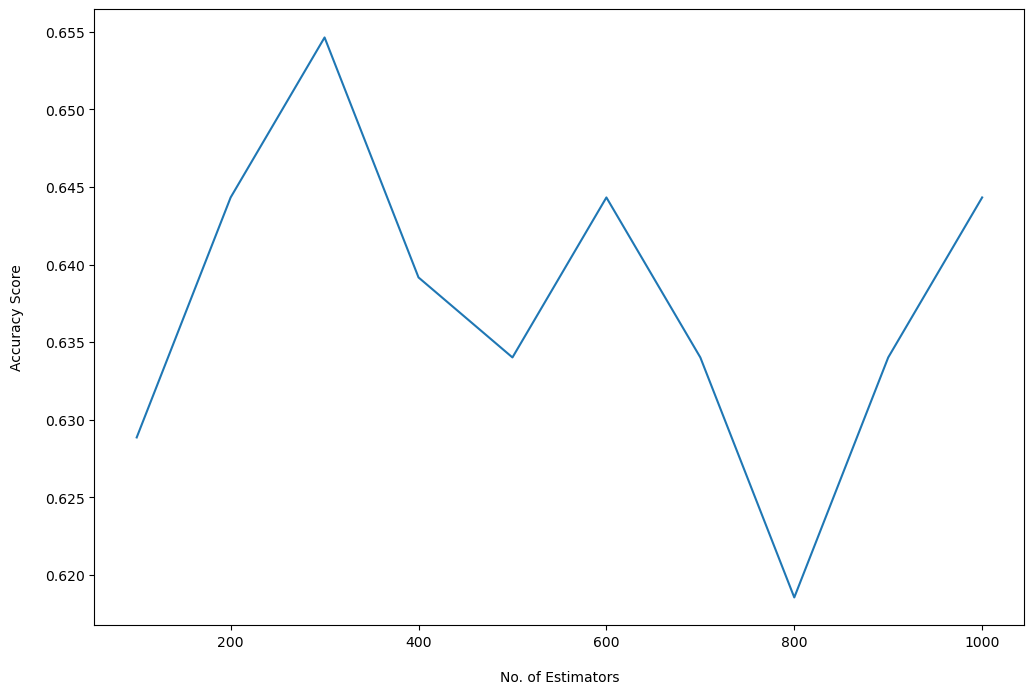

In [57]:
plt.figure(figsize=(12,8))
sns.lineplot(np.arange(100,1001,100),scores)
plt.xlabel('No. of Estimators',labelpad=15)
plt.ylabel('Accuracy Score',labelpad=15)


In [58]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))



[[49  0  1  0]
 [ 5 25 17  5]
 [ 7  6 19  7]
 [ 1  4 18 30]]
              precision    recall  f1-score   support

           1       0.79      0.98      0.87        50
           2       0.71      0.48      0.57        52
           3       0.35      0.49      0.40        39
           4       0.71      0.57      0.63        53

    accuracy                           0.63       194
   macro avg       0.64      0.63      0.62       194
weighted avg       0.66      0.63      0.63       194



<AxesSubplot:xlabel='Importance', ylabel='Feature'>

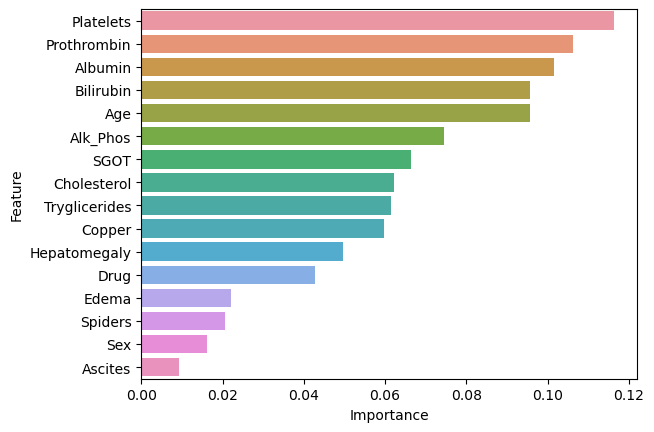

In [59]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')



In [60]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

et_pred = et.predict(X_test)
print(confusion_matrix(y_test,et_pred))
print(classification_report(y_test,et_pred))


[[49  0  1  0]
 [ 7 25 15  5]
 [ 7  7 18  7]
 [ 0  7 18 28]]
              precision    recall  f1-score   support

           1       0.78      0.98      0.87        50
           2       0.64      0.48      0.55        52
           3       0.35      0.46      0.40        39
           4       0.70      0.53      0.60        53

    accuracy                           0.62       194
   macro avg       0.62      0.61      0.60       194
weighted avg       0.63      0.62      0.61       194



In [61]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

abc_pred = abc.predict(X_test)
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))


[[35 12  3  0]
 [12 21  9 10]
 [ 7  7 12 13]
 [ 2  9 12 30]]
              precision    recall  f1-score   support

           1       0.62      0.70      0.66        50
           2       0.43      0.40      0.42        52
           3       0.33      0.31      0.32        39
           4       0.57      0.57      0.57        53

    accuracy                           0.51       194
   macro avg       0.49      0.49      0.49       194
weighted avg       0.50      0.51      0.50       194



In [62]:
cb = CatBoostClassifier()
cb.fit(X_train,y_train)

cb_pred = cb.predict(X_test)
print(confusion_matrix(y_test,cb_pred))
print(classification_report(y_test,cb_pred))


Learning rate set to 0.075969
0:	learn: 1.3597593	total: 186ms	remaining: 3m 5s
1:	learn: 1.3420408	total: 196ms	remaining: 1m 37s
2:	learn: 1.3191141	total: 205ms	remaining: 1m 8s
3:	learn: 1.2975041	total: 215ms	remaining: 53.6s
4:	learn: 1.2813396	total: 226ms	remaining: 45s
5:	learn: 1.2620607	total: 237ms	remaining: 39.2s
6:	learn: 1.2438696	total: 248ms	remaining: 35.1s
7:	learn: 1.2255034	total: 258ms	remaining: 32s
8:	learn: 1.2043430	total: 268ms	remaining: 29.5s
9:	learn: 1.1870495	total: 278ms	remaining: 27.5s
10:	learn: 1.1690090	total: 287ms	remaining: 25.8s
11:	learn: 1.1556113	total: 295ms	remaining: 24.3s
12:	learn: 1.1415099	total: 305ms	remaining: 23.2s
13:	learn: 1.1321989	total: 315ms	remaining: 22.2s
14:	learn: 1.1172814	total: 325ms	remaining: 21.3s
15:	learn: 1.1056071	total: 334ms	remaining: 20.6s
16:	learn: 1.0905719	total: 345ms	remaining: 19.9s
17:	learn: 1.0768431	total: 354ms	remaining: 19.3s
18:	learn: 1.0639807	total: 365ms	remaining: 18.8s
19:	learn: 1.0

165:	learn: 0.4079585	total: 2.03s	remaining: 10.2s
166:	learn: 0.4059301	total: 2.05s	remaining: 10.2s
167:	learn: 0.4032574	total: 2.06s	remaining: 10.2s
168:	learn: 0.4011464	total: 2.07s	remaining: 10.2s
169:	learn: 0.3993047	total: 2.08s	remaining: 10.2s
170:	learn: 0.3972281	total: 2.1s	remaining: 10.2s
171:	learn: 0.3953420	total: 2.11s	remaining: 10.1s
172:	learn: 0.3930507	total: 2.12s	remaining: 10.1s
173:	learn: 0.3916665	total: 2.13s	remaining: 10.1s
174:	learn: 0.3900243	total: 2.14s	remaining: 10.1s
175:	learn: 0.3878380	total: 2.15s	remaining: 10.1s
176:	learn: 0.3859208	total: 2.16s	remaining: 10s
177:	learn: 0.3840446	total: 2.17s	remaining: 10s
178:	learn: 0.3822804	total: 2.18s	remaining: 10s
179:	learn: 0.3810098	total: 2.19s	remaining: 10s
180:	learn: 0.3790280	total: 2.21s	remaining: 9.98s
181:	learn: 0.3776813	total: 2.22s	remaining: 9.97s
182:	learn: 0.3760229	total: 2.23s	remaining: 9.96s
183:	learn: 0.3748491	total: 2.24s	remaining: 9.94s
184:	learn: 0.3736208

334:	learn: 0.2122579	total: 4.07s	remaining: 8.07s
335:	learn: 0.2116078	total: 4.08s	remaining: 8.06s
336:	learn: 0.2106121	total: 4.09s	remaining: 8.05s
337:	learn: 0.2102512	total: 4.11s	remaining: 8.04s
338:	learn: 0.2096831	total: 4.12s	remaining: 8.03s
339:	learn: 0.2087417	total: 4.13s	remaining: 8.01s
340:	learn: 0.2079722	total: 4.14s	remaining: 8s
341:	learn: 0.2074242	total: 4.15s	remaining: 7.99s
342:	learn: 0.2067209	total: 4.16s	remaining: 7.97s
343:	learn: 0.2059485	total: 4.17s	remaining: 7.96s
344:	learn: 0.2053175	total: 4.19s	remaining: 7.95s
345:	learn: 0.2048146	total: 4.2s	remaining: 7.94s
346:	learn: 0.2039153	total: 4.21s	remaining: 7.92s
347:	learn: 0.2031003	total: 4.22s	remaining: 7.91s
348:	learn: 0.2022029	total: 4.23s	remaining: 7.89s
349:	learn: 0.2017073	total: 4.24s	remaining: 7.88s
350:	learn: 0.2009743	total: 4.25s	remaining: 7.87s
351:	learn: 0.2005999	total: 4.27s	remaining: 7.86s
352:	learn: 0.1998986	total: 4.28s	remaining: 7.84s
353:	learn: 0.19

507:	learn: 0.1292439	total: 6.1s	remaining: 5.91s
508:	learn: 0.1288938	total: 6.12s	remaining: 5.9s
509:	learn: 0.1285807	total: 6.13s	remaining: 5.89s
510:	learn: 0.1282097	total: 6.14s	remaining: 5.87s
511:	learn: 0.1279530	total: 6.16s	remaining: 5.87s
512:	learn: 0.1275522	total: 6.17s	remaining: 5.86s
513:	learn: 0.1271918	total: 6.18s	remaining: 5.84s
514:	learn: 0.1269335	total: 6.19s	remaining: 5.83s
515:	learn: 0.1266726	total: 6.2s	remaining: 5.82s
516:	learn: 0.1264319	total: 6.21s	remaining: 5.8s
517:	learn: 0.1261477	total: 6.23s	remaining: 5.79s
518:	learn: 0.1258624	total: 6.24s	remaining: 5.78s
519:	learn: 0.1257258	total: 6.25s	remaining: 5.77s
520:	learn: 0.1252383	total: 6.26s	remaining: 5.76s
521:	learn: 0.1250171	total: 6.27s	remaining: 5.74s
522:	learn: 0.1246544	total: 6.29s	remaining: 5.73s
523:	learn: 0.1242819	total: 6.3s	remaining: 5.72s
524:	learn: 0.1239532	total: 6.31s	remaining: 5.71s
525:	learn: 0.1235525	total: 6.32s	remaining: 5.7s
526:	learn: 0.1229

677:	learn: 0.0879973	total: 8.11s	remaining: 3.85s
678:	learn: 0.0878409	total: 8.12s	remaining: 3.84s
679:	learn: 0.0877174	total: 8.14s	remaining: 3.83s
680:	learn: 0.0875253	total: 8.15s	remaining: 3.82s
681:	learn: 0.0873381	total: 8.17s	remaining: 3.81s
682:	learn: 0.0872524	total: 8.18s	remaining: 3.8s
683:	learn: 0.0871068	total: 8.19s	remaining: 3.78s
684:	learn: 0.0868503	total: 8.2s	remaining: 3.77s
685:	learn: 0.0866839	total: 8.21s	remaining: 3.76s
686:	learn: 0.0864896	total: 8.22s	remaining: 3.75s
687:	learn: 0.0863515	total: 8.24s	remaining: 3.73s
688:	learn: 0.0862691	total: 8.25s	remaining: 3.72s
689:	learn: 0.0861568	total: 8.26s	remaining: 3.71s
690:	learn: 0.0859714	total: 8.27s	remaining: 3.7s
691:	learn: 0.0857605	total: 8.28s	remaining: 3.68s
692:	learn: 0.0855993	total: 8.29s	remaining: 3.67s
693:	learn: 0.0853829	total: 8.3s	remaining: 3.66s
694:	learn: 0.0852021	total: 8.31s	remaining: 3.65s
695:	learn: 0.0850542	total: 8.32s	remaining: 3.63s
696:	learn: 0.08

852:	learn: 0.0647841	total: 10.1s	remaining: 1.74s
853:	learn: 0.0646883	total: 10.1s	remaining: 1.73s
854:	learn: 0.0645888	total: 10.2s	remaining: 1.72s
855:	learn: 0.0644622	total: 10.2s	remaining: 1.71s
856:	learn: 0.0643496	total: 10.2s	remaining: 1.7s
857:	learn: 0.0642251	total: 10.2s	remaining: 1.69s
858:	learn: 0.0641102	total: 10.2s	remaining: 1.67s
859:	learn: 0.0640512	total: 10.2s	remaining: 1.66s
860:	learn: 0.0639460	total: 10.2s	remaining: 1.65s
861:	learn: 0.0638949	total: 10.2s	remaining: 1.64s
862:	learn: 0.0638363	total: 10.2s	remaining: 1.63s
863:	learn: 0.0636790	total: 10.3s	remaining: 1.61s
864:	learn: 0.0635602	total: 10.3s	remaining: 1.6s
865:	learn: 0.0635083	total: 10.3s	remaining: 1.59s
866:	learn: 0.0633881	total: 10.3s	remaining: 1.58s
867:	learn: 0.0632730	total: 10.3s	remaining: 1.57s
868:	learn: 0.0631764	total: 10.3s	remaining: 1.55s
869:	learn: 0.0630731	total: 10.3s	remaining: 1.54s
870:	learn: 0.0629078	total: 10.3s	remaining: 1.53s
871:	learn: 0.

In [63]:
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train,y_train)

hgb_pred = hgb.predict(X_test)
print(confusion_matrix(y_test,hgb_pred))
print(classification_report(y_test,hgb_pred))



[[47  0  1  2]
 [ 8 21 16  7]
 [ 5  5 20  9]
 [ 2  8 15 28]]
              precision    recall  f1-score   support

           1       0.76      0.94      0.84        50
           2       0.62      0.40      0.49        52
           3       0.38      0.51      0.44        39
           4       0.61      0.53      0.57        53

    accuracy                           0.60       194
   macro avg       0.59      0.60      0.58       194
weighted avg       0.60      0.60      0.59       194



In [64]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

bag_pred = bag.predict(X_test)
print(confusion_matrix(y_test,bag_pred))
print(classification_report(y_test,bag_pred))



[[48  0  0  2]
 [14 24  8  6]
 [ 6  7 18  8]
 [ 3  5 18 27]]
              precision    recall  f1-score   support

           1       0.68      0.96      0.79        50
           2       0.67      0.46      0.55        52
           3       0.41      0.46      0.43        39
           4       0.63      0.51      0.56        53

    accuracy                           0.60       194
   macro avg       0.59      0.60      0.58       194
weighted avg       0.61      0.60      0.59       194



In [65]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

gnb_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))



[[48  0  0  2]
 [43  0  9  0]
 [28  0  8  3]
 [31  0  3 19]]
              precision    recall  f1-score   support

           1       0.32      0.96      0.48        50
           2       0.00      0.00      0.00        52
           3       0.40      0.21      0.27        39
           4       0.79      0.36      0.49        53

    accuracy                           0.39       194
   macro avg       0.38      0.38      0.31       194
weighted avg       0.38      0.39      0.31       194



In [66]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

gbc_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))


[[49  0  1  0]
 [ 8 24 13  7]
 [ 5  7 16 11]
 [ 4  5 12 32]]
              precision    recall  f1-score   support

           1       0.74      0.98      0.84        50
           2       0.67      0.46      0.55        52
           3       0.38      0.41      0.40        39
           4       0.64      0.60      0.62        53

    accuracy                           0.62       194
   macro avg       0.61      0.61      0.60       194
weighted avg       0.62      0.62      0.61       194



In [67]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)


lgbm_pred = lgbm.predict(X_test)
print(confusion_matrix(y_test,lgbm_pred))
print(classification_report(y_test,lgbm_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1084
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 16
[LightGBM] [Info] Start training from score -1.399717
[LightGBM] [Info] Start training from score -1.417900
[LightGBM] [Info] Start training from score -1.305227
[LightGBM] [Info] Start training from score -1.427116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [68]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

bnb_pred = bnb.predict(X_test)
print(confusion_matrix(y_test,bnb_pred))
print(classification_report(y_test,bnb_pred))



[[29  9  8  4]
 [16 12 15  9]
 [ 8 10 14  7]
 [ 2 12 10 29]]
              precision    recall  f1-score   support

           1       0.53      0.58      0.55        50
           2       0.28      0.23      0.25        52
           3       0.30      0.36      0.33        39
           4       0.59      0.55      0.57        53

    accuracy                           0.43       194
   macro avg       0.42      0.43      0.42       194
weighted avg       0.43      0.43      0.43       194



In [75]:

print("Accuracy Score of Logistic Regression:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(pac.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of SGD Classifer:",str(np.round(sgd.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(ridge.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(gnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(bnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rf.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(gbc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram Gradient Boosting Classifier:",str(np.round(hgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(bag.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ada Boost Classifier:",str(np.round(abc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Light GBM Classifier:",str(np.round(lgbm.score(X_test,y_test)*100,2)) + '%')


Accuracy Score of Logistic Regression: 45.36%
Accuracy Score of Passive Aggressive Classifier: 35.57%
Accuracy Score of SGD Classifer: 36.6%
Accuracy Score of Ridge Classifier: 43.81%
Accuracy Score of Gaussian Naive Bayes: 38.66%
Accuracy Score of Bernoulli Naive Bayes: 43.3%
Accuracy Score of K Neighbors Classifier: 47.42%
Accuracy Score of Support Vector Classifier: 53.61%
Accuracy Score of Decision Tree Classifier: 55.67%
Accuracy Score of Random Forest Classifier: 63.4%
Accuracy Score of Cat Boost Classifier: 65.46%
Accuracy Score of Gradient Boosting Classifier: 62.37%
Accuracy Score of Histogram Gradient Boosting Classifier: 59.79%
Accuracy Score of Bagging Classifier: 60.31%
Accuracy Score of Ada Boost Classifier: 50.52%
Accuracy Score of Extra Trees Classifier: 61.86%
Accuracy Score of Light GBM Classifier: 62.89%
